In [10]:
import tensorflow as tf

from tensorflow import keras

In [11]:

# fashion mnist dataset ko load kiya
fmnist = keras.datasets.fashion_mnist
# y-axis yahan pe lables hain
(train_images, train_labels), (test_images, test_lables) = fmnist.load_data()


In [12]:
# ab ham data check kare gye
(X_train, y_train), (X_test, y_test) = fmnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [13]:
# Sumrise the loades dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' %(X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


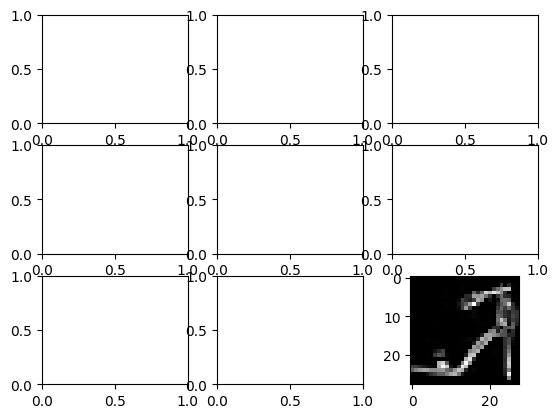

In [14]:
# plot first few images
import matplotlib.pyplot as plt

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot row pixel data
plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    # show the figure
plt.show()

In [15]:
# data ko normalize krne k liye
# Preprocess the data
X_train = X_train/255.0
X_test = X_test/255.0

In [16]:
# model create kar rhy hain yahan pe

model = keras.Sequential([
    # 28*28 ka mtlb imgae ka size hain , Flatter 28*28 ko simple linear array may convert kr deta h
    keras.layers.Flatten(input_shape = (28,28)),
    
    keras.layers.Dense(128, activation = tf.nn.relu),
# 10 means 10 neurons bcs humare pas 10 classes hain 
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

  # Complie the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# train the model
model.fit(X_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4976 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3735 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3347 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3114 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2951 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2815 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2687 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2589 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2495 - accuracy: 0.9071
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss: 0.3259

In [18]:
# Make predication with model
predications = model.predict(X_test)

#Print the shape of the predication array
print(predications.shape)

# Print the first 10 predications
print(predications[:10])

#Convert the predications to class labels
class_labels =[tf.argmax(predication) for predication in predications] 

#print the fisrt 10 class labels
print(class_labels[:10])

313/313 [==============================] - 1s 4ms/step
(10000, 10)
[[1.1174825e-06 2.7104161e-09 1.7057612e-07 4.7564364e-10 7.9471171e-08
  8.8290614e-04 6.2216749e-08 7.4092876e-03 8.9016851e-07 9.9170542e-01]
 [2.1839132e-04 3.0471987e-09 9.9268931e-01 2.5116340e-10 5.2052573e-03
  1.3486021e-11 1.8863145e-03 1.0600102e-16 6.8257765e-07 2.6065587e-11]
 [2.4109097e-09 1.0000000e+00 2.5748270e-10 1.8255387e-08 1.8393091e-08
  4.0550720e-20 3.0465479e-09 5.3079544e-19 2.8062708e-15 5.7839082e-18]
 [8.2119032e-09 9.9999464e-01 7.0868272e-10 5.3840113e-06 1.6693180e-08
  5.7981510e-17 1.8508528e-08 2.6159535e-18 1.1550042e-12 2.0995207e-15]
 [4.3388143e-01 1.6937616e-06 8.6227236e-03 2.1760282e-04 5.0956372e-04
  5.3289132e-06 5.5675757e-01 4.2241069e-07 1.3760680e-06 2.2336874e-06]
 [7.8491979e-07 9.9999869e-01 7.5389210e-08 1.6309168e-07 1.5366730e-07
  1.0234313e-16 1.3976937e-07 3.6100703e-17 1.7671408e-12 5.7525756e-15]
 [1.8228382e-05 1.4486999e-06 3.7087072e-03 1.0682471e-06 9.809

Epoch 1/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5062 - accuracy: 0.8213 - val_loss: 0.3946 - val_accuracy: 0.8612
Epoch 2/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3813 - accuracy: 0.8609 - val_loss: 0.3588 - val_accuracy: 0.8706
Epoch 3/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3422 - accuracy: 0.8757 - val_loss: 0.3464 - val_accuracy: 0.8786
Epoch 4/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3180 - accuracy: 0.8827 - val_loss: 0.3432 - val_accuracy: 0.8774
Epoch 5/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2967 - accuracy: 0.8918 - val_loss: 0.3485 - val_accuracy: 0.8764


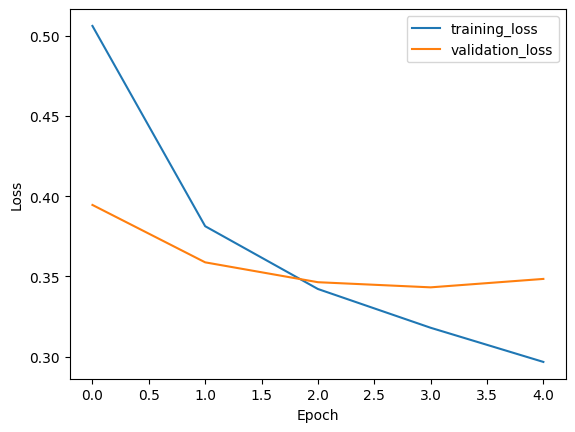

In [22]:
# import the library

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

# load the fashion mnist dataset
(X_train, y_train), (X_test, y_test)= tf.keras.datasets.fashion_mnist.load_data()


# data ko normalize krne k liye
# Preprocess the data
x_train = X_train/255.0
x_test = X_test/255.0

# spilt the traing data into training and valedation sets
x_val = x_train[:5000]
y_val = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]

#Bulid the model

model = keras.Sequential([
    # 28*28 ka mtlb imgae ka size hain , Flatter 28*28 ko simple linear array may convert kr deta h
    keras.layers.Flatten(input_shape = (28,28)),
    
    keras.layers.Dense(128, activation = tf.nn.relu),
# 10 means 10 neurons bcs humare pas 10 classes hain 
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

  # Complie the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))


# Plot the training and valedation loss

plt.plot(history.history['loss'], label= 'training_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

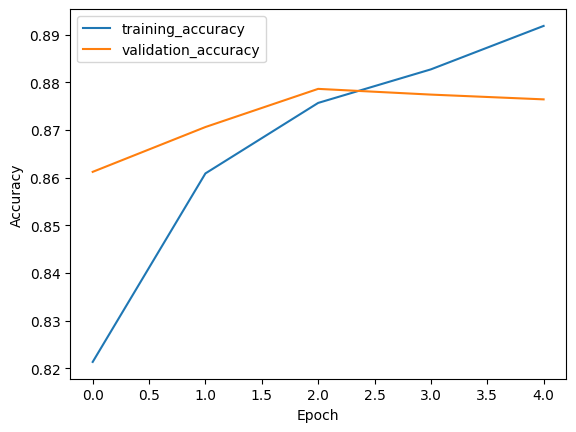

In [23]:
# Plot the training and valedation accuracy

plt.plot(history.history['accuracy'], label= 'training_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()